In [4]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import os
import sys 

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Set plot style
sns.set(style="whitegrid")

In [3]:
DATA_DIR = "../data/raw/"
tickers = ["TSLA", "BND", "SPY"]

In [4]:
dfs = {}

for ticker in tickers:
    path = os.path.join(DATA_DIR, f"{ticker}.csv")
    df = pd.read_csv(path, index_col=0, parse_dates=True, date_format="%Y-%m-%d")
    df.index.name = "Date"
    dfs[ticker] = df
    print(f"{ticker} shape: {df.shape}")


TSLA shape: (2538, 6)
BND shape: (2538, 6)
SPY shape: (2538, 6)


In [5]:
for ticker, df in dfs.items():
    print(f"\n--- {ticker} ---")
    print(df.info())
    print(df.isna().sum())
    display(df.head(2))



--- TSLA ---
<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, Ticker to 2025-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  2537 non-null   object
 1   Close      2537 non-null   object
 2   High       2537 non-null   object
 3   Low        2537 non-null   object
 4   Open       2537 non-null   object
 5   Volume     2537 non-null   object
dtypes: object(6)
memory usage: 138.8+ KB
None
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64


Adj Close Close  High   Low  Open Volume
Date                                           
Ticker      TSLA  TSLA  TSLA  TSLA  TSLA   TSLA
Date         NaN   NaN   NaN   NaN   NaN    NaN


--- BND ---
<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, Ticker to 2025-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  2537 non-null   object
 1   Close      2537 non-null   object
 2   High       2537 non-null   object
 3   Low        2537 non-null   object
 4   Open       2537 non-null   object
 5   Volume     2537 non-null   object
dtypes: object(6)
memory usage: 138.8+ KB
None
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64


Adj Close Close High  Low Open Volume
Date                                        
Ticker       BND   BND  BND  BND  BND    BND
Date         NaN   NaN  NaN  NaN  NaN    NaN


--- SPY ---
<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, Ticker to 2025-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  2537 non-null   object
 1   Close      2537 non-null   object
 2   High       2537 non-null   object
 3   Low        2537 non-null   object
 4   Open       2537 non-null   object
 5   Volume     2537 non-null   object
dtypes: object(6)
memory usage: 138.8+ KB
None
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64


Adj Close Close High  Low Open Volume
Date                                        
Ticker       SPY   SPY  SPY  SPY  SPY    SPY
Date         NaN   NaN  NaN  NaN  NaN    NaN

In [6]:
from src.data_cleaning import clean_price_data
# Load the raw data for TSLA, BND, and SPY from the CSV files
tsla_df_raw = pd.read_csv('../data/raw/TSLA.csv')
bnd_df_raw = pd.read_csv('../data/raw/BND.csv')
spy_df_raw = pd.read_csv('../data/raw/SPY.csv')

# Clean the data using the improved function
tsla_df_cleaned = clean_price_data(tsla_df_raw)
bnd_df_cleaned = clean_price_data(bnd_df_raw)
spy_df_cleaned = clean_price_data(spy_df_raw)

# Display the head of the cleaned dataframes to verify the result
print("TSLA Cleaned Data:")
print(tsla_df_cleaned.head())
print("\nBND Cleaned Data:")
print(bnd_df_cleaned.head())
print("\nSPY Cleaned Data:")
print(spy_df_cleaned.head())

TSLA Cleaned Data:
        Price  Adj Close      Close       High        Low       Open  \
2  2015-07-01  17.943333  17.943333  18.174667  17.856667  18.073999   
3  2015-07-02  18.667999  18.667999  18.830000  18.220667  18.680000   
4  2015-07-06  18.648001  18.648001  18.779333  18.420000  18.591999   
5  2015-07-07  17.858667  17.858667  18.346666  17.384666  18.333332   
6  2015-07-08  16.997334  16.997334  17.386667  16.954000  17.288000   

      Volume  
2   31518000  
3  107458500  
4   61828500  
5   91576500  
6   93316500  

BND Cleaned Data:
        Price  Adj Close      Close       High        Low       Open   Volume
2  2015-07-01  60.816715  80.900002  81.029999  80.830002  80.870003  5399300
3  2015-07-02  60.967091  81.099998  81.180000  81.059998  81.059998  1060100
4  2015-07-06  61.177574  81.379997  81.440002  81.220001  81.440002  2210700
5  2015-07-07  61.237717  81.459999  81.769997  81.459999  81.690002  4183200
6  2015-07-08  61.410610  81.690002  81.760002  8

In [7]:
from src.data_cleaning import calculate_log_returns

# Assuming you have already loaded and cleaned the dataframes
tsla_df_returns = calculate_log_returns(tsla_df_cleaned.copy())
bnd_df_returns = calculate_log_returns(bnd_df_cleaned.copy())
spy_df_returns = calculate_log_returns(spy_df_cleaned.copy())

# Display the head of the new dataframes to verify the result
print("TSLA Data with Log Returns:")
print(tsla_df_returns.head())
print("\nBND Data with Log Returns:")
print(bnd_df_returns.head())
print("\nSPY Data with Log Returns:")
print(spy_df_returns.head())

TSLA Data with Log Returns:
        Price  Adj Close      Close       High        Low       Open  \
3  2015-07-02  18.667999  18.667999  18.830000  18.220667  18.680000   
4  2015-07-06  18.648001  18.648001  18.779333  18.420000  18.591999   
5  2015-07-07  17.858667  17.858667  18.346666  17.384666  18.333332   
6  2015-07-08  16.997334  16.997334  17.386667  16.954000  17.288000   
7  2015-07-09  17.194668  17.194668  17.530001  17.119333  17.271999   

      Volume  Log_Returns  
3  107458500     0.039592  
4   61828500    -0.001072  
5   91576500    -0.043250  
6   93316500    -0.049432  
7   50011500     0.011543  

BND Data with Log Returns:
        Price  Adj Close      Close       High        Low       Open   Volume  \
3  2015-07-02  60.967091  81.099998  81.180000  81.059998  81.059998  1060100   
4  2015-07-06  61.177574  81.379997  81.440002  81.220001  81.440002  2210700   
5  2015-07-07  61.237717  81.459999  81.769997  81.459999  81.690002  4183200   
6  2015-07-08  61.4

In [8]:
from src.data_cleaning import adf_test
# Assuming you have loaded and cleaned the data already:
# tsla_df_cleaned, bnd_df_cleaned, spy_df_cleaned
# and calculated the returns:
# tsla_df_returns, bnd_df_returns, spy_df_returns

# Test the stationarity of the raw 'Adj Close' price data
for ticker, df in [('TSLA', tsla_df_cleaned), ('BND', bnd_df_cleaned), ('SPY', spy_df_cleaned)]:
    adf_test(df['Adj Close'], title=f"{ticker} (Raw Prices)")

# Test the stationarity of the 'Log_Returns' data
for ticker, df in [('TSLA', tsla_df_returns), ('BND', bnd_df_returns), ('SPY', spy_df_returns)]:
    adf_test(df['Log_Returns'], title=f"{ticker} (Log Returns)")

Augmented Dickey-Fuller Test for: TSLA (Raw Prices)
ADF Statistic: -1.45
p-value: 0.5560
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57
Result: The series is NOT stationary.

Augmented Dickey-Fuller Test for: BND (Raw Prices)
ADF Statistic: -1.53
p-value: 0.5166
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57
Result: The series is NOT stationary.

Augmented Dickey-Fuller Test for: SPY (Raw Prices)
ADF Statistic: 0.66
p-value: 0.9891
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57
Result: The series is NOT stationary.

Augmented Dickey-Fuller Test for: TSLA (Log Returns)
ADF Statistic: -11.72
p-value: 0.0000
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57
Result: The series is stationary.

Augmented Dickey-Fuller Test for: BND (Log Returns)
ADF Statistic: -9.94
p-value: 0.0000
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57
Result: The series is stationary.

Augmented Dickey-Fuller Test for: SPY (Log Returns)
ADF Statistic: -16.11
p-value: 0

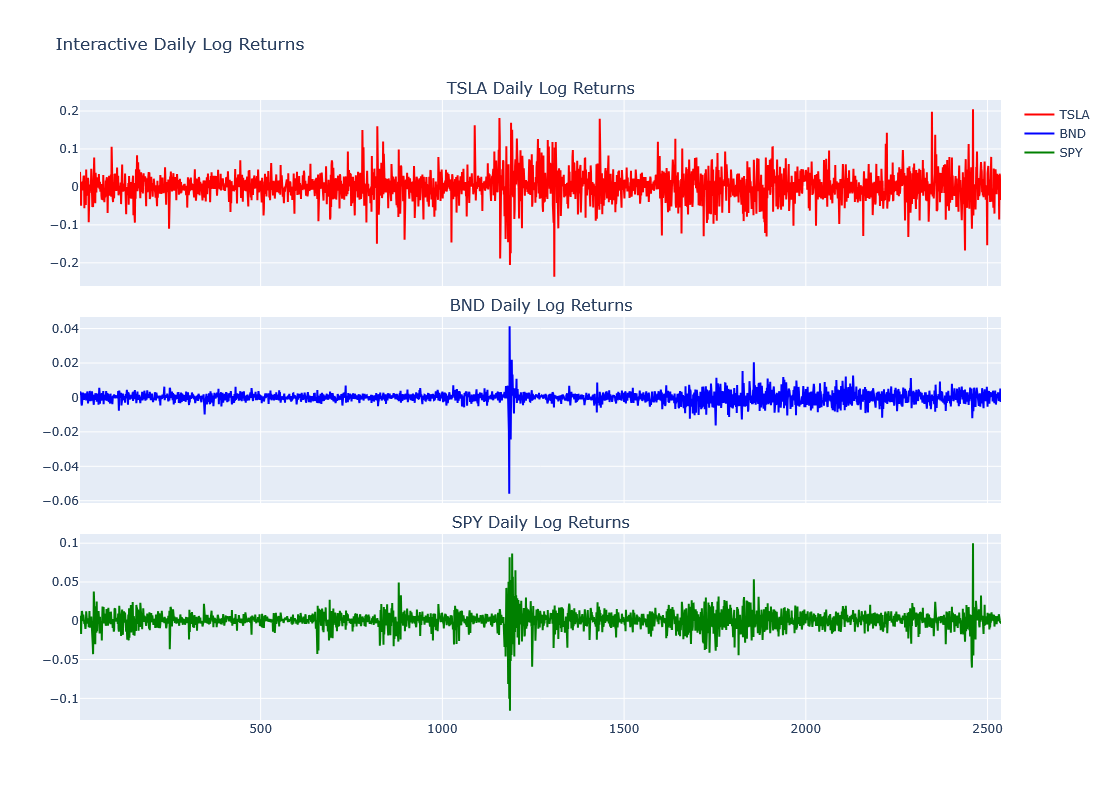

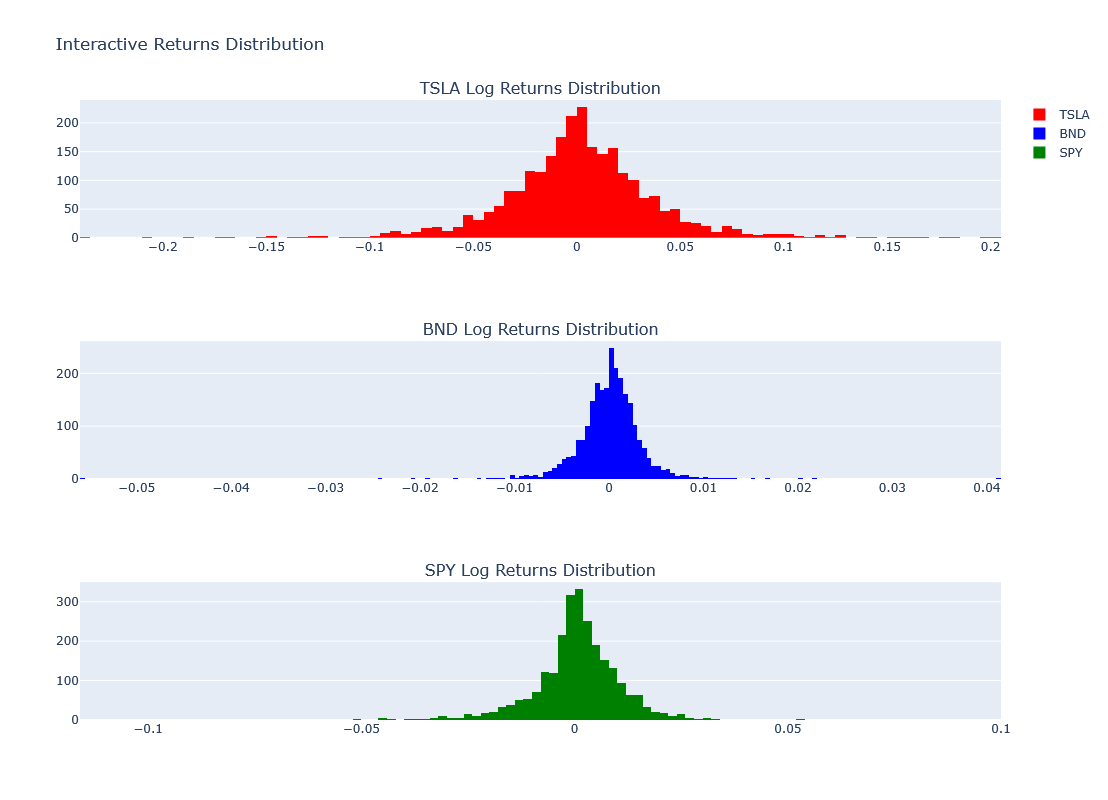

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots for the interactive time series plots
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    subplot_titles=('TSLA Daily Log Returns', 'BND Daily Log Returns', 'SPY Daily Log Returns')
)

# Add TSLA trace
fig.add_trace(
    go.Scatter(x=tsla_df_returns.index, y=tsla_df_returns['Log_Returns'], mode='lines', name='TSLA', line=dict(color='red')),
    row=1, col=1
)

# Add BND trace
fig.add_trace(
    go.Scatter(x=bnd_df_returns.index, y=bnd_df_returns['Log_Returns'], mode='lines', name='BND', line=dict(color='blue')),
    row=2, col=1
)

# Add SPY trace
fig.add_trace(
    go.Scatter(x=spy_df_returns.index, y=spy_df_returns['Log_Returns'], mode='lines', name='SPY', line=dict(color='green')),
    row=3, col=1
)

# Update layout
fig.update_layout(height=800, title_text='Interactive Daily Log Returns', showlegend=True)
fig.show()

# ---
# Interactive Return Distribution Plots
# ---
fig_dist = make_subplots(
    rows=3, cols=1,
    subplot_titles=('TSLA Log Returns Distribution', 'BND Log Returns Distribution', 'SPY Log Returns Distribution')
)

# Add TSLA distribution
fig_dist.add_trace(go.Histogram(x=tsla_df_returns['Log_Returns'], name='TSLA', marker_color='red'), row=1, col=1)

# Add BND distribution
fig_dist.add_trace(go.Histogram(x=bnd_df_returns['Log_Returns'], name='BND', marker_color='blue'), row=2, col=1)

# Add SPY distribution
fig_dist.add_trace(go.Histogram(x=spy_df_returns['Log_Returns'], name='SPY', marker_color='green'), row=3, col=1)

# Update layout
fig_dist.update_layout(height=800, title_text='Interactive Returns Distribution', showlegend=True)
fig_dist.show()

In [9]:
# Import the new function
from src.data_cleaning import calculate_var_sharpe

# Create a dictionary to store the results
results = {}

# Calculate and store the metrics for each asset
results['TSLA'] = calculate_var_sharpe(tsla_df_returns['Log_Returns'])
results['BND'] = calculate_var_sharpe(bnd_df_returns['Log_Returns'])
results['SPY'] = calculate_var_sharpe(spy_df_returns['Log_Returns'])

# Display the results
for ticker, metrics in results.items():
    print(f"{ticker} VaR (95% confidence): {metrics['VaR']:.4f}")
    print(f"{ticker} Sharpe Ratio (annualized): {metrics['Sharpe_Ratio']:.4f}")
    print()

TSLA VaR (95% confidence): 0.0562
TSLA Sharpe Ratio (annualized): 0.4790

BND VaR (95% confidence): 0.0049
BND Sharpe Ratio (annualized): 0.3290

SPY VaR (95% confidence): 0.0173
SPY Sharpe Ratio (annualized): 0.6987



In [ ]:
Analysis of Risk and Return

    VaR (Value at Risk): The VaR values confirm the risk profiles of each asset.

        TSLA has the highest VaR at 0.0562, meaning there is a 5% chance of a daily loss of 5.62% or more. This is consistent with its role as a high-growth, high-risk asset.

        BND has the lowest VaR at 0.0049, indicating it is a very stable, low-risk asset.

        SPY sits in the middle with a VaR of 0.0173, reflecting its diversified, moderate-risk nature.

    Sharpe Ratio: The Sharpe Ratios measure the risk-adjusted return, which is a key metric for a finance professional.

    SPY has the highest Sharpe Ratio at 0.6987. This means it has historically provided the best return for the level of risk it carries.

    TSLA follows with a Sharpe Ratio of 0.4790. While it has high potential returns, it also has very high volatility, which lowers its risk-adjusted return compared to SPY.

    BND has the lowest Sharpe Ratio at 0.3290, as expected for a stable, low-return asset.

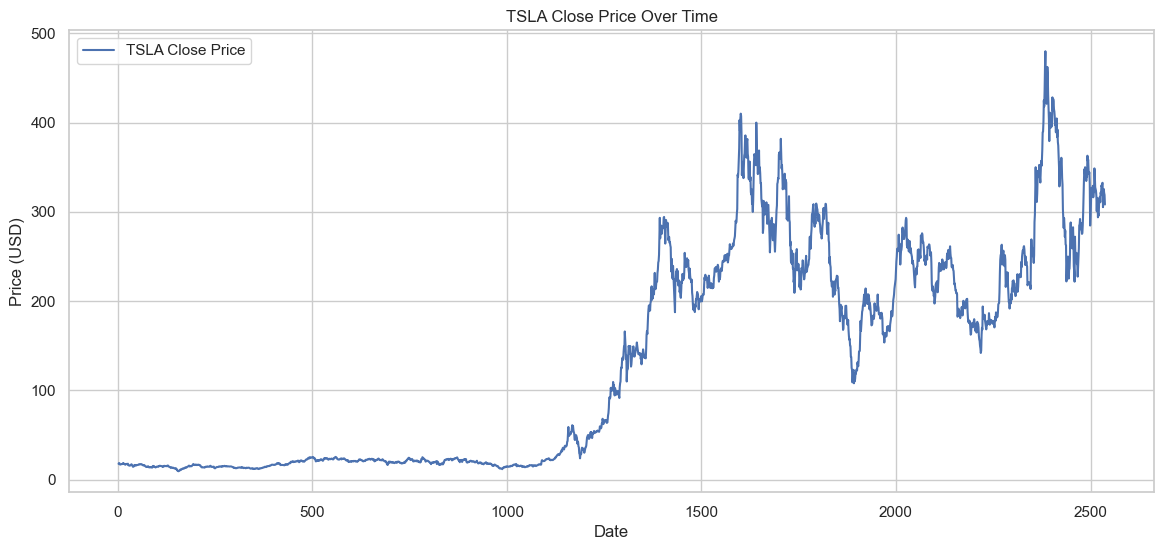

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14,6))
plt.plot(tsla_df_cleaned.index, tsla_df_cleaned['Close'], label='TSLA Close Price')
plt.title('TSLA Close Price Over Time')## TSLA Price Movement Summary (2015–2025)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


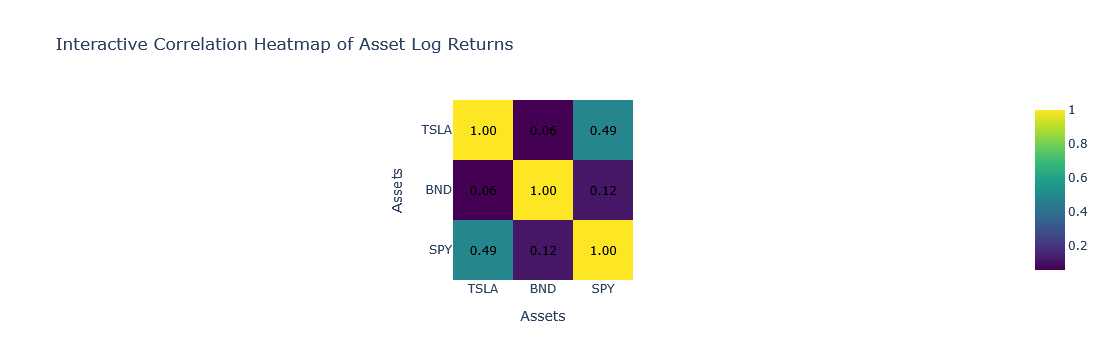

In [18]:
import plotly.express as px
# 4. Combine the log returns into a single DataFrame
all_returns = pd.DataFrame({
    'TSLA': tsla_df_returns['Log_Returns'],
    'BND': bnd_df_returns['Log_Returns'],
    'SPY': spy_df_returns['Log_Returns']
})

# 5. Calculate the correlation matrix
correlation_matrix = all_returns.corr()

# 6. Create an interactive correlation heatmap with Plotly
fig = px.imshow(
    correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    color_continuous_scale='Viridis',
    title='Interactive Correlation Heatmap of Asset Log Returns'
)

# Add annotations (text labels) to the heatmap cells
for i, row in enumerate(correlation_matrix.values):
    for j, val in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.index[i],
            text=f'{val:.2f}',
            showarrow=False,
            font=dict(color='black')
        )

fig.update_layout(
    xaxis_title='Assets',
    yaxis_title='Assets',
)

fig.show()


In [ ]:
- **2015–2019**: TSLA traded below $30 with minimal volatility, indicating a relatively stable market perception.
- **Late 2019–Early 2020**: A sharp upward movement marked the beginning of a major bull run, driven by strong fundamentals and market confidence.
- **2020–Early 2021**: Massive surge in price, peaking over $400. Investor enthusiasm and tech stock momentum contributed.
- **2021–Mid 2022**: High volatility set in. While the stock stayed above $200, fluctuations increased due to macroeconomic uncertainty.
- **Mid 2022–Late 2023**: A downturn bottomed out near the end of 2022, followed by a steady recovery.
- **Late 2023–Mid 2025**: Renewed growth led to a new all-time high in mid-2024. After that, the price corrected but remained in a higher band, reflecting market normalization.

These structural changes are ideal candidates for **change point detection** using Bayesian modeling.

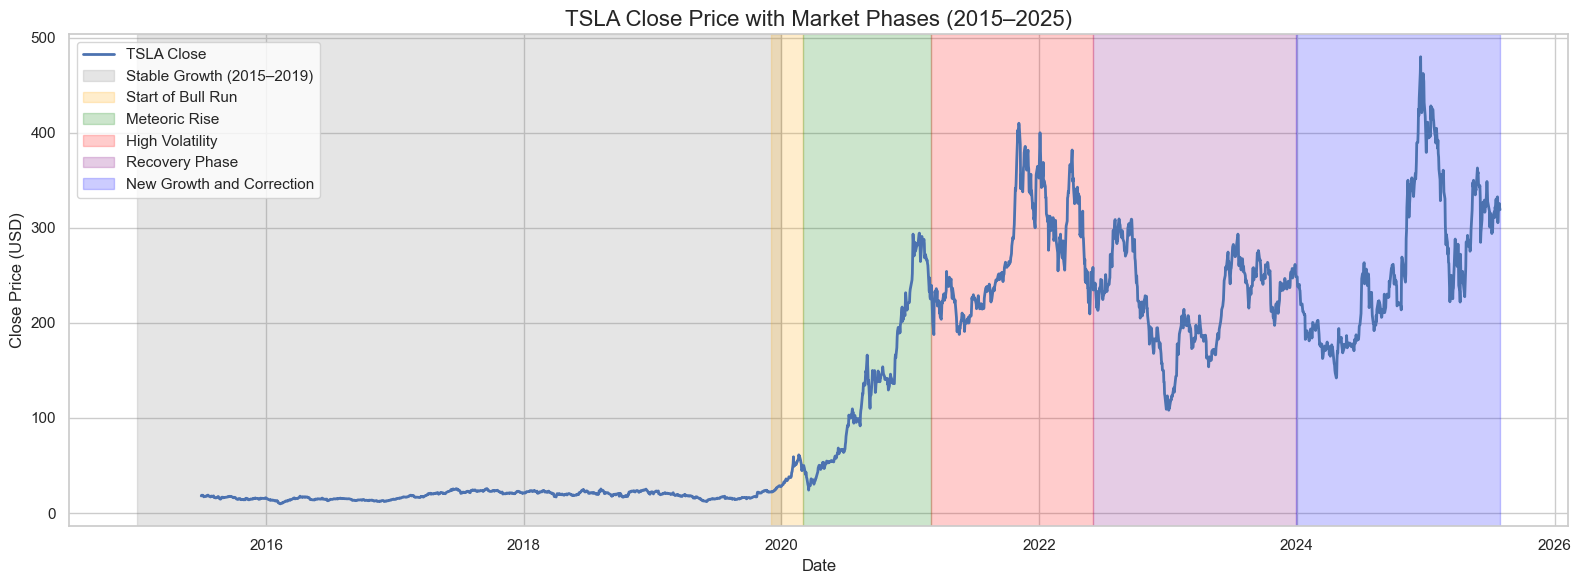

In [20]:
plt.figure(figsize=(16,6))
plt.plot(tsla_clean.index, tsla_clean['Close'], label='TSLA Close', linewidth=2)

# Annotating key periods
plt.axvspan('2015-01-01', '2019-12-31', color='gray', alpha=0.2, label='Stable Growth (2015–2019)')
plt.axvspan('2019-12-01', '2020-03-01', color='orange', alpha=0.2, label='Start of Bull Run')
plt.axvspan('2020-03-01', '2021-03-01', color='green', alpha=0.2, label='Meteoric Rise')
plt.axvspan('2021-03-01', '2022-06-01', color='red', alpha=0.2, label='High Volatility')
plt.axvspan('2022-06-01', '2023-12-31', color='purple', alpha=0.2, label='Recovery Phase')
plt.axvspan('2023-12-31', '2025-07-31', color='blue', alpha=0.2, label='New Growth and Correction')

plt.title('TSLA Close Price with Market Phases (2015–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


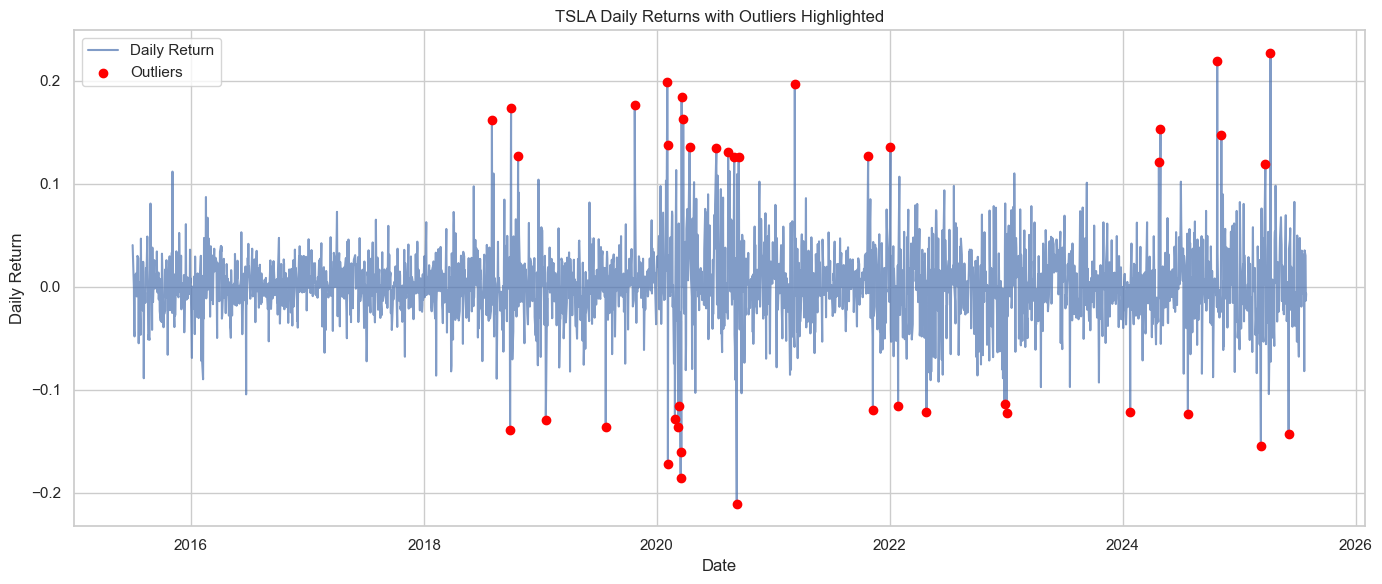

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate daily percentage change if not already
tsla_clean['daily_return'] = tsla_clean['Close'].pct_change()

# Drop NaN from first row
tsla_clean.dropna(subset=['daily_return'], inplace=True)

# Calculate Z-score of the daily returns
tsla_clean['z_score'] = zscore(tsla_clean['daily_return'])

# Identify outliers
outliers = tsla_clean[np.abs(tsla_clean['z_score']) > 3]

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(tsla_clean.index, tsla_clean['daily_return'], label='Daily Return', alpha=0.7)
plt.scatter(outliers.index, outliers['daily_return'], color='red', label='Outliers', zorder=5)
plt.title('TSLA Daily Returns with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
data = {
    'TSLA': tsla_df,
    'BND': bnd_df,
    'SPY': spy_df
}

In [28]:
for ticker, df in data.items():
    print(f"{ticker} - Non-numeric in 'Close':", df['Close'].apply(lambda x: isinstance(x, str)).sum())


TSLA - Non-numeric in 'Close': 2536
BND - Non-numeric in 'Close': 2536
SPY - Non-numeric in 'Close': 2536


In [29]:
for ticker in data:
    df = data[ticker].copy()
    df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    data[ticker] = df.dropna()


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaled_data = {}

for ticker in ['TSLA', 'BND', 'SPY']:
    df = data[ticker].copy()

    # Ensure index is datetime
    df = df.sort_index()  # optional but ensures order

    # Only fit on numeric Close column
    scaler = MinMaxScaler()
    df['Normalized_Close'] = scaler.fit_transform(df[['Close']])

    scaled_data[ticker] = df


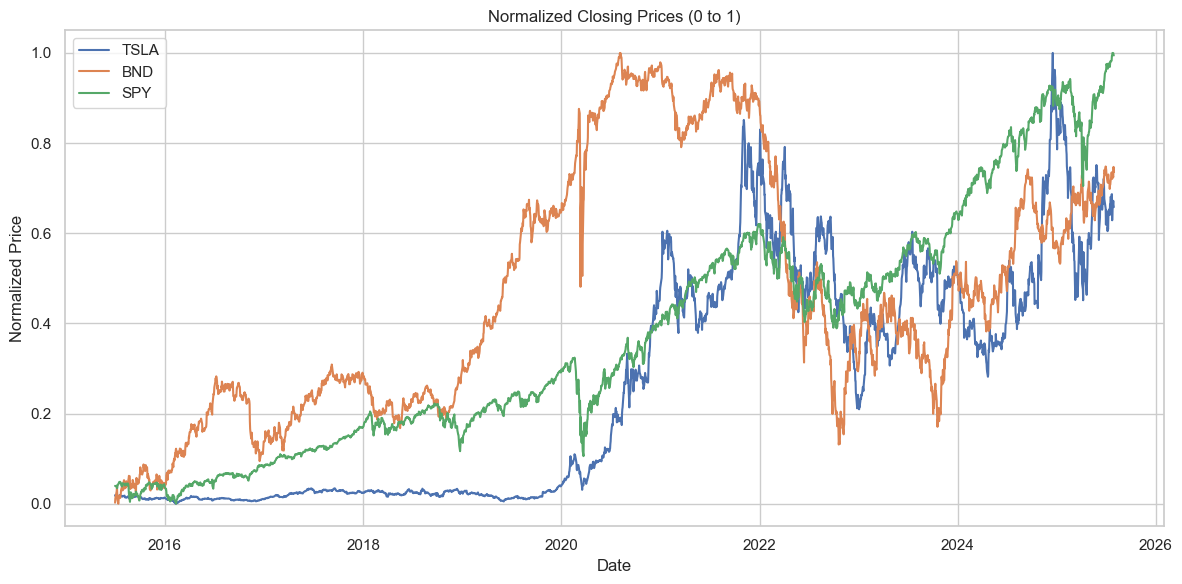

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for ticker in scaled_data:
    plt.plot(scaled_data[ticker].index, scaled_data[ticker]['Normalized_Close'], label=ticker)

plt.title("Normalized Closing Prices (0 to 1)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
summary = """
Normalized Price Trends (2015–2024)

- **TSLA (Blue Line)**: This asset showed the most dramatic and volatile performance. For several years (2015–2019), it remained at a low, stable normalized price. A massive surge began in late 2019, peaking in late 2021. After this peak, it experienced a significant correction but has since recovered and is trading at a high level. TSLA's normalized price shows its extreme growth and subsequent volatility compared to the other two assets.

- **BND (Orange Line)**: This represents a bond fund, which is typically considered a more conservative and less volatile investment. From 2015 to 2020, BND showed steady, albeit slow, growth. However, after 2020, it experienced a significant and consistent decline in value, reaching its low point around 2024. This reflects a period of rising interest rates, which typically cause bond prices to fall.

- **SPY (Green Line)**: This represents the S&P 500, a broad market index and a common benchmark for the overall stock market. SPY showed a consistent and steady upward trend throughout the entire period from 2015 to 2024, with only a few minor dips, such as the one in early 2020. This indicates a strong and sustained bull market for the S&P 500 over this decade.

**Summary**: The normalized chart effectively visualizes the different risk and return profiles of these three assets. TSLA represents a high-risk, high-reward growth stock. SPY represents the steady, long-term growth of the overall market. BND represents a more conservative asset whose performance was significantly impacted by macroeconomic factors like interest rates, particularly in recent years.
"""

with open("../reports/normalized_price_analysis.txt", "w") as f:
    f.write(summary.strip())


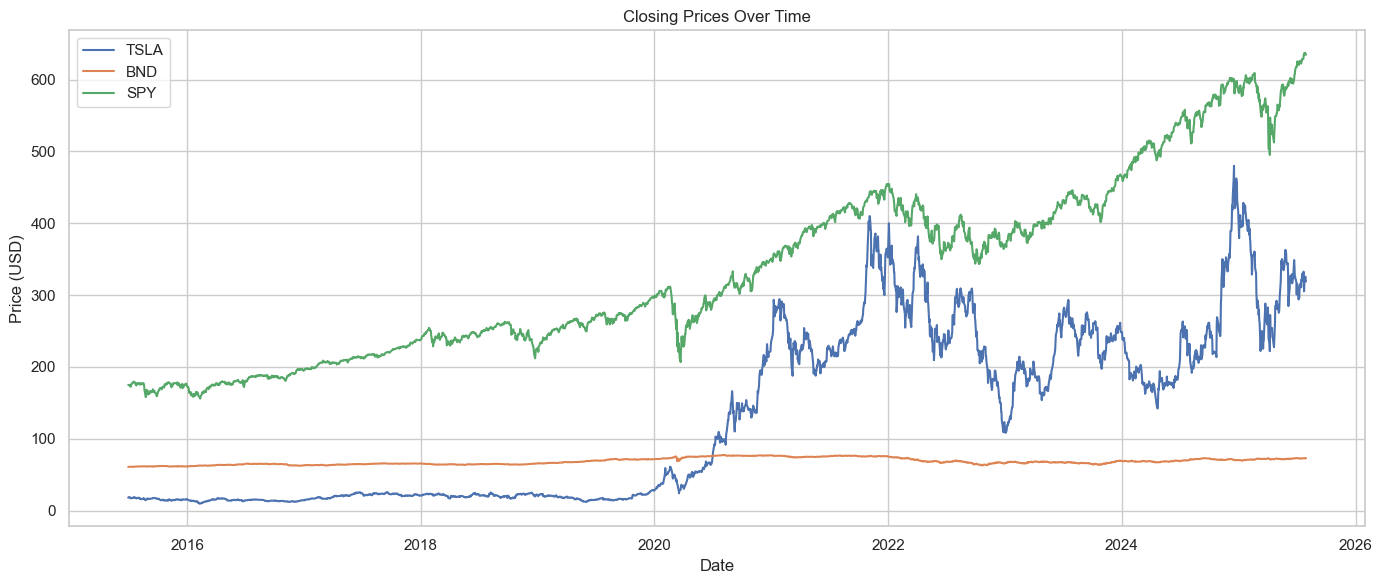

In [35]:
import matplotlib.pyplot as plt

# Plot closing prices for all three assets
plt.figure(figsize=(14, 6))
for ticker in ['TSLA', 'BND', 'SPY']:
    plt.plot(data[ticker]['Close'], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


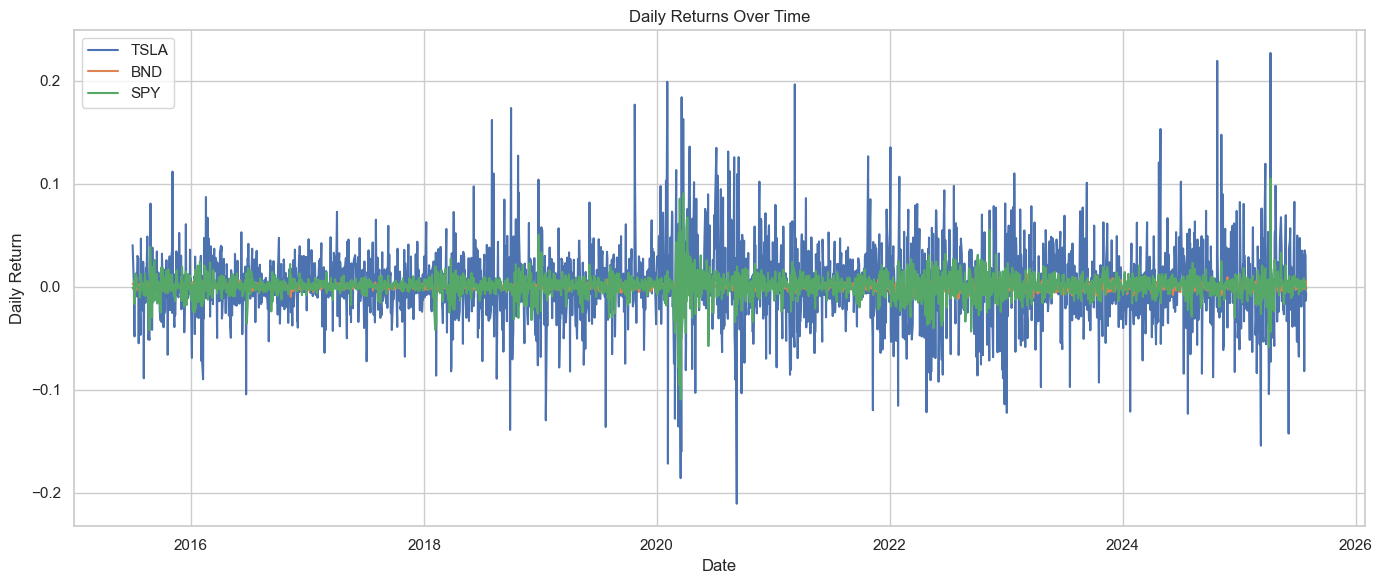

In [36]:
# Calculate daily returns
for ticker in ['TSLA', 'BND', 'SPY']:
    data[ticker]['Daily_Return'] = data[ticker]['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 6))
for ticker in ['TSLA', 'BND', 'SPY']:
    plt.plot(data[ticker]['Daily_Return'], label=ticker)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


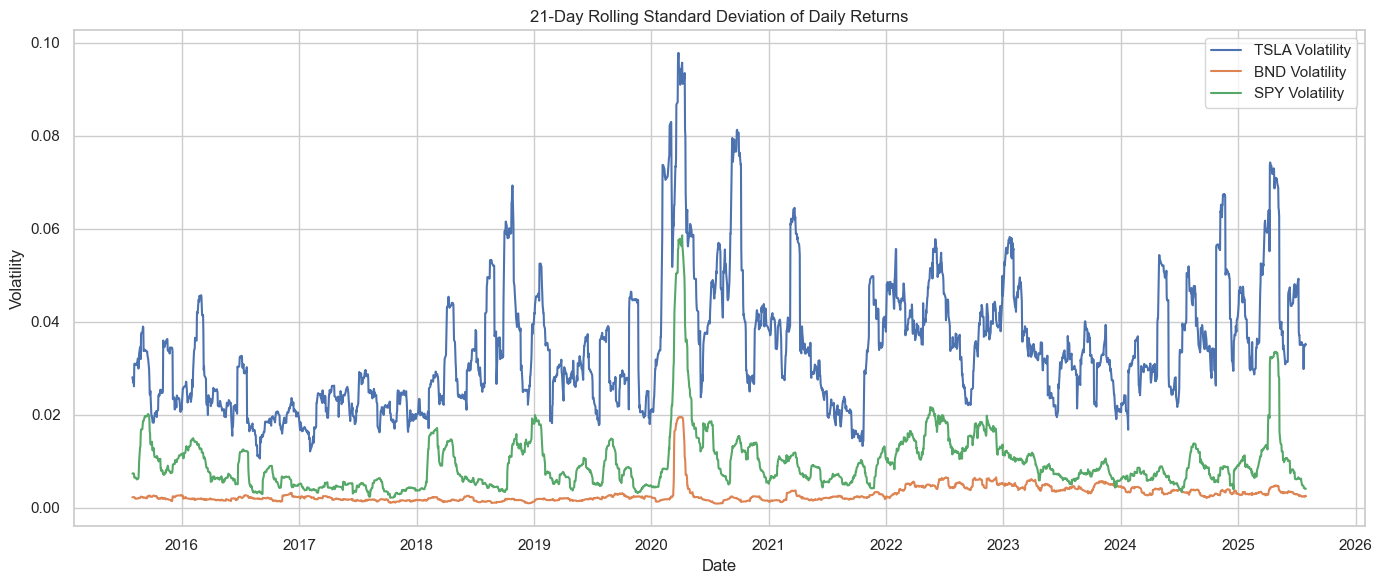

In [37]:
# Calculate rolling mean and std for volatility
window = 21  # ~1 month of trading days
for ticker in ['TSLA', 'BND', 'SPY']:
    data[ticker]['Rolling_Mean'] = data[ticker]['Daily_Return'].rolling(window).mean()
    data[ticker]['Rolling_Std'] = data[ticker]['Daily_Return'].rolling(window).std()

# Plot rolling volatility (standard deviation)
plt.figure(figsize=(14, 6))
for ticker in ['TSLA', 'BND', 'SPY']:
    plt.plot(data[ticker]['Rolling_Std'], label=f"{ticker} Volatility")
plt.title('21-Day Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


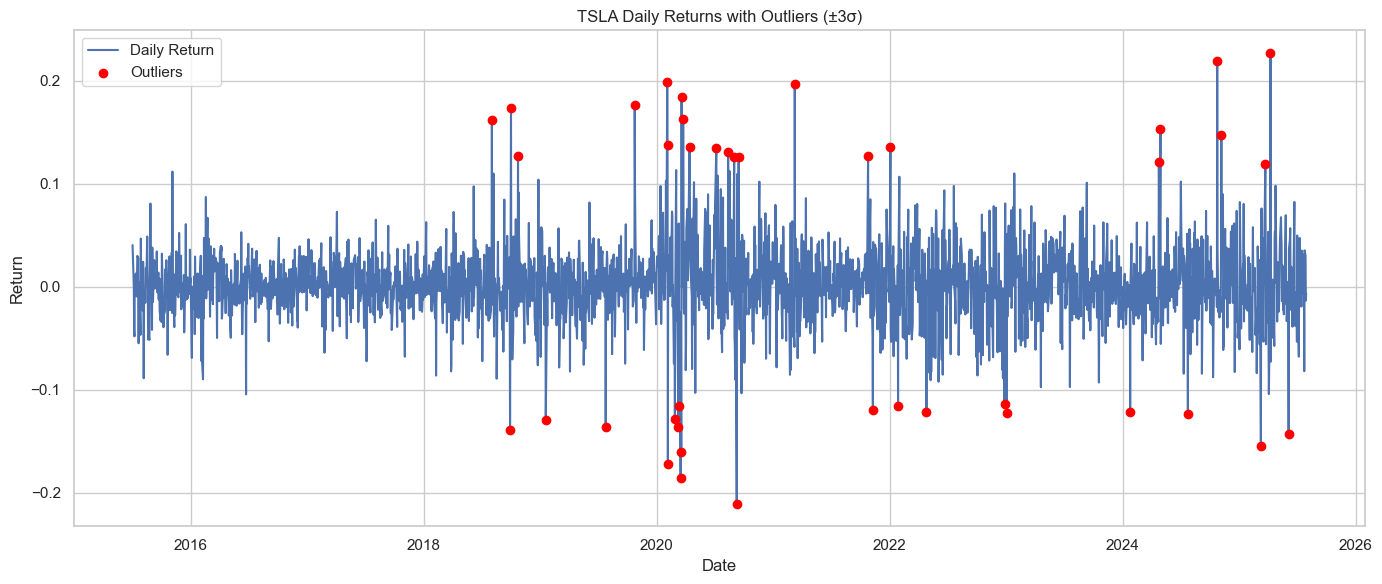

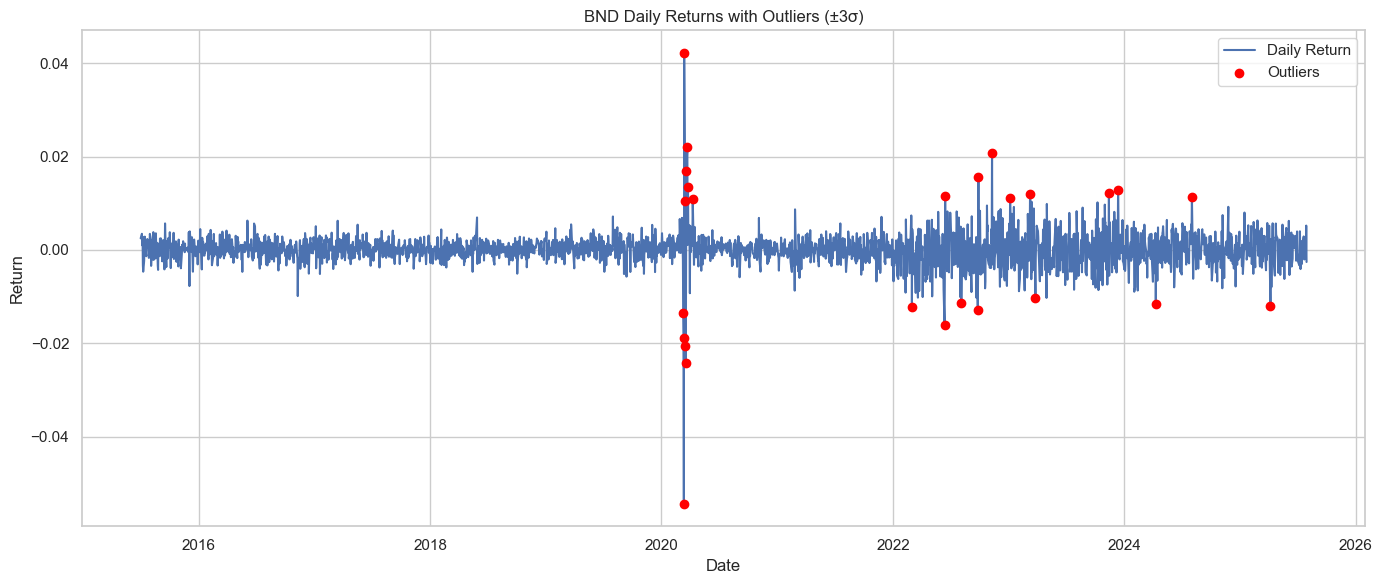

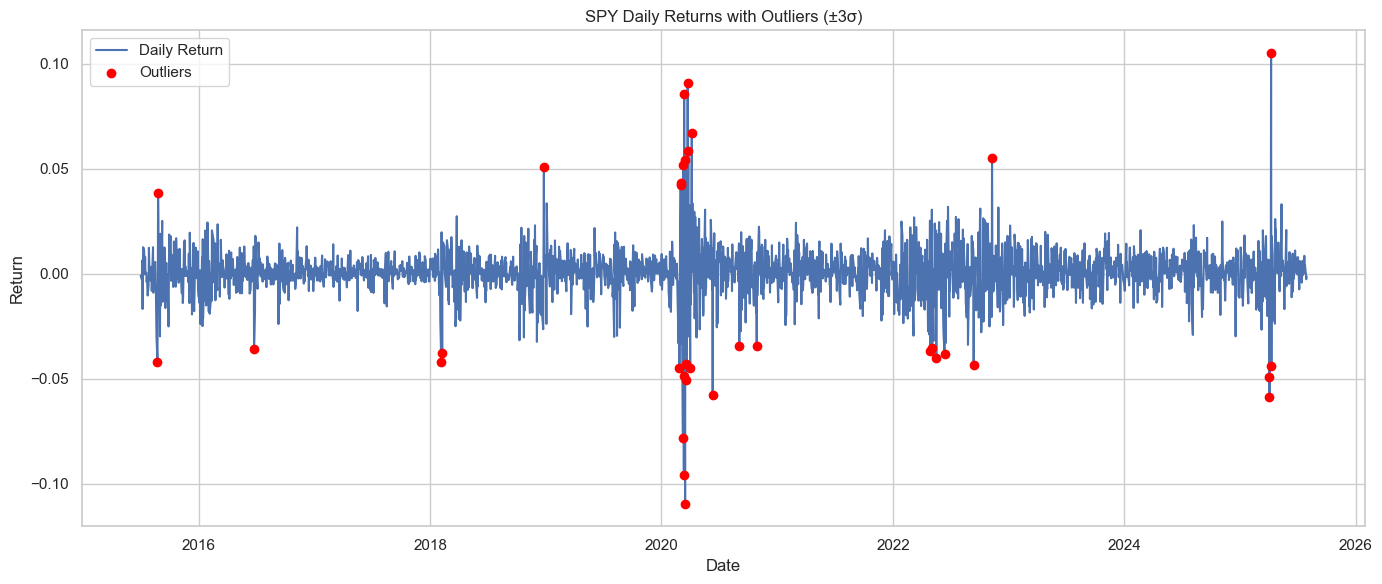

In [38]:
# Set threshold for outliers (e.g., ±3 standard deviations)
threshold = 3

for ticker in ['TSLA', 'BND', 'SPY']:
    std = data[ticker]['Daily_Return'].std()
    mean = data[ticker]['Daily_Return'].mean()
    data[ticker]['Outlier'] = data[ticker]['Daily_Return'].apply(
        lambda x: abs(x - mean) > threshold * std
    )

    # Plot outliers
    plt.figure(figsize=(14, 6))
    plt.plot(data[ticker]['Daily_Return'], label='Daily Return')
    plt.scatter(
        data[ticker].loc[data[ticker]['Outlier']].index,
        data[ticker].loc[data[ticker]['Outlier'], 'Daily_Return'],
        color='red', label='Outliers', zorder=5
    )
    plt.title(f'{ticker} Daily Returns with Outliers (±{threshold}σ)')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [39]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(series, series_name):
    """
    Perform Augmented Dickey-Fuller test and print interpretation.
    """
    print(f"\nADF Test for {series_name}:")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Used Lag: {result[2]}")
    print(f"Number of Observations: {result[3]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")

    if result[1] < 0.05:
        print(f"Conclusion: Reject the null hypothesis - {series_name} is stationary.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis - {series_name} is non-stationary, differencing is recommended.")

# Assuming you have cleaned DataFrames: tsla_clean, bnd_clean, spy_clean

# Calculate daily returns (percentage change)
tsla_clean['Daily_Returns'] = tsla_clean['Close'].pct_change()
bnd_clean['Daily_Returns'] = bnd_clean['Close'].pct_change()
spy_clean['Daily_Returns'] = spy_clean['Close'].pct_change()

# Perform ADF test on closing prices
adf_test(tsla_clean['Close'], 'TSLA Closing Prices')
adf_test(bnd_clean['Close'], 'BND Closing Prices')
adf_test(spy_clean['Close'], 'SPY Closing Prices')

# Perform ADF test on daily returns
adf_test(tsla_clean['Daily_Returns'], 'TSLA Daily Returns')
adf_test(bnd_clean['Daily_Returns'], 'BND Daily Returns')
adf_test(spy_clean['Daily_Returns'], 'SPY Daily Returns')



ADF Test for TSLA Closing Prices:
ADF Statistic: -1.4195
p-value: 0.5729
Used Lag: 27
Number of Observations: 2506
Critical Value (1%): -3.4330
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Conclusion: Fail to reject the null hypothesis - TSLA Closing Prices is non-stationary, differencing is recommended.

ADF Test for BND Closing Prices:
ADF Statistic: -1.5362
p-value: 0.5155
Used Lag: 13
Number of Observations: 2521
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Conclusion: Fail to reject the null hypothesis - BND Closing Prices is non-stationary, differencing is recommended.

ADF Test for SPY Closing Prices:
ADF Statistic: 0.6908
p-value: 0.9897
Used Lag: 9
Number of Observations: 2525
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Conclusion: Fail to reject the null hypothesis - SPY Closing Prices is non-stationary, differencing is recommended.

ADF Test for TSLA Daily Returns:
ADF Stati

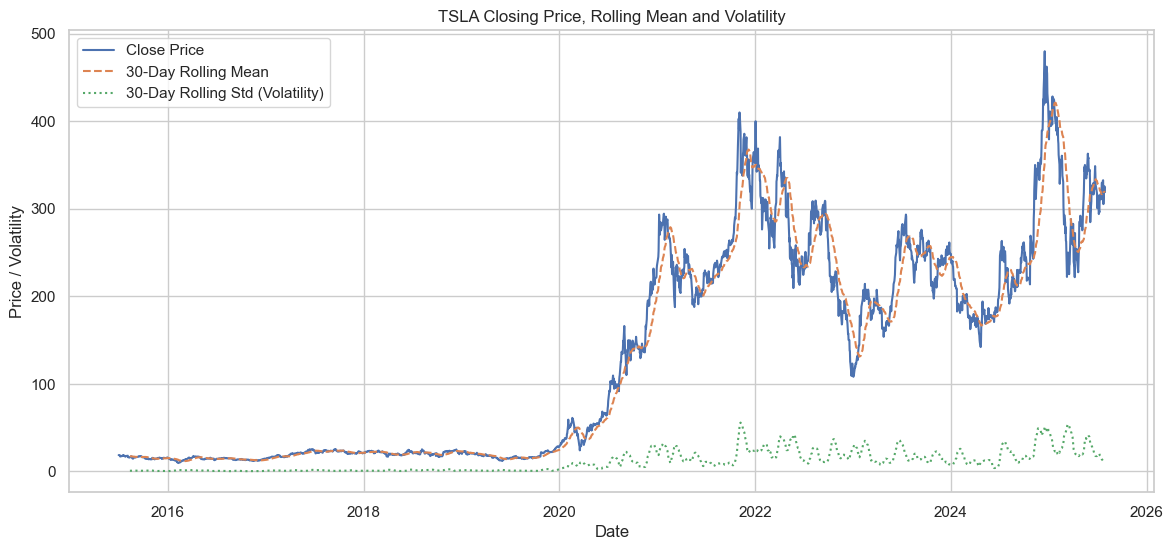

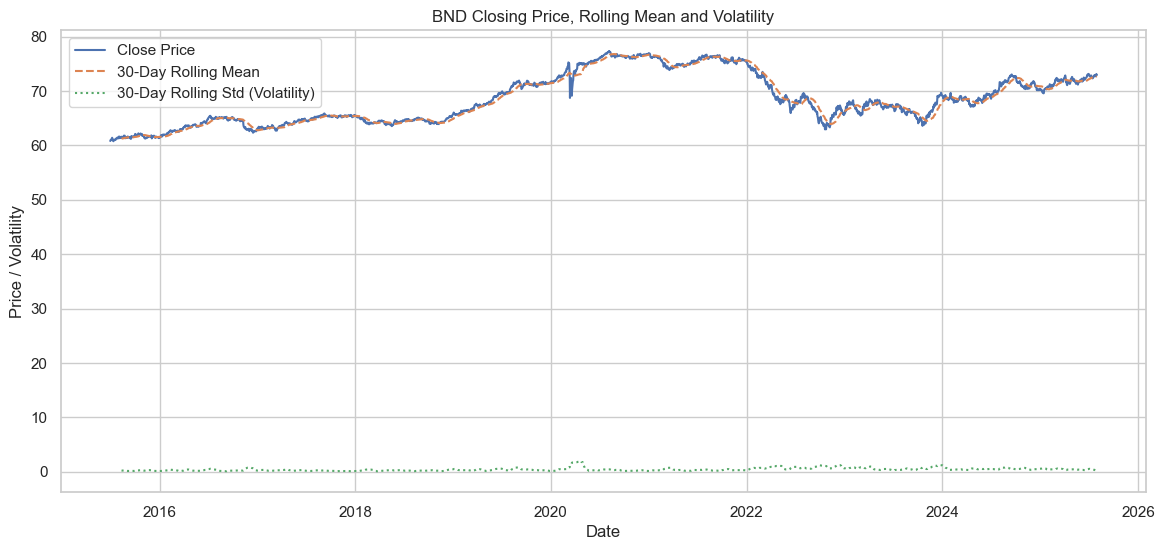

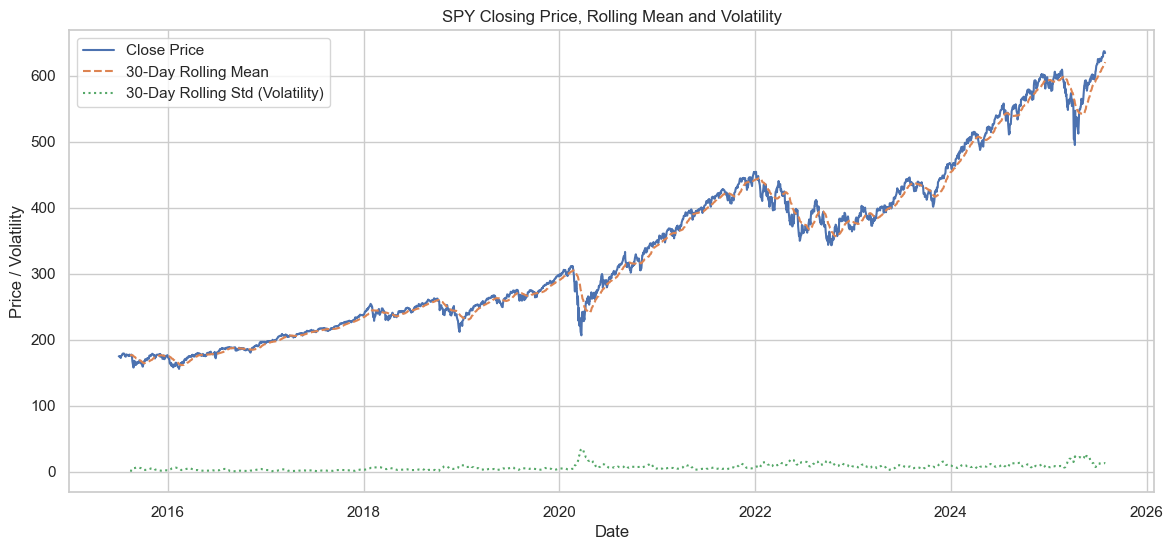

In [40]:
import matplotlib.pyplot as plt

# Define rolling window size (e.g., 30 trading days ~ 1 month)
window_size = 30

# Create a dictionary of your cleaned DataFrames if not already
data = {
    'TSLA': tsla_clean,
    'BND': bnd_clean,
    'SPY': spy_clean
}

for ticker, df in data.items():
    # Calculate rolling mean and rolling std for closing prices
    df['Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=window_size).std()

    # Plot Closing price, Rolling Mean, and Rolling Std (volatility)
    plt.figure(figsize=(14,6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['Rolling_Mean'], label=f'{window_size}-Day Rolling Mean', linestyle='--')
    plt.plot(df.index, df['Rolling_Std'], label=f'{window_size}-Day Rolling Std (Volatility)', linestyle=':')
    plt.title(f'{ticker} Closing Price, Rolling Mean and Volatility')
    plt.xlabel('Date')
    plt.ylabel('Price / Volatility')
    plt.legend()
    plt.show()


In [44]:
# Convert 'Close' to numeric, coercing errors to NaN
tsla_df['Close'] = pd.to_numeric(tsla_df['Close'], errors='coerce')
bnd_df['Close'] = pd.to_numeric(bnd_df['Close'], errors='coerce')
spy_df['Close'] = pd.to_numeric(spy_df['Close'], errors='coerce')

# Drop rows where Close is NaN after conversion
tsla_df = tsla_df.dropna(subset=['Close'])
bnd_df = bnd_df.dropna(subset=['Close'])
spy_df = spy_df.dropna(subset=['Close'])


In [45]:
tsla_returns = tsla_df['Close'].pct_change().dropna()
bnd_returns = bnd_df['Close'].pct_change().dropna()
spy_returns = spy_df['Close'].pct_change().dropna()


In [46]:
import numpy as np

def calculate_var_sharpe(returns, confidence_level=0.95, trading_days=252):
    """
    Calculate daily VaR and annualized Sharpe Ratio for a series of returns.
    
    Args:
        returns (pd.Series): Daily return series.
        confidence_level (float): Confidence level for VaR calculation (default 0.95).
        trading_days (int): Number of trading days in a year (default 252).
        
    Returns:
        dict: {'VaR': float, 'Sharpe_Ratio': float}
    """
    # Calculate daily VaR (percentile of losses)
    var = np.percentile(returns, (1 - confidence_level) * 100)
    
    # Calculate annualized Sharpe Ratio (mean excess return / std dev * sqrt(trading_days))
    # Assuming risk-free rate ~0 for simplicity (can adjust if you have rf rate)
    mean_return = returns.mean()
    std_return = returns.std()
    sharpe_ratio = (mean_return / std_return) * np.sqrt(trading_days) if std_return != 0 else np.nan
    
    return {'VaR': var, 'Sharpe_Ratio': sharpe_ratio}

# Example: Calculate for TSLA, BND, SPY daily returns
results = {}
for ticker, returns in [('TSLA', tsla_returns), ('BND', bnd_returns), ('SPY', spy_returns)]:
    results[ticker] = calculate_var_sharpe(returns)

# Display results
for ticker, metrics in results.items():
    print(f"{ticker} VaR (95% confidence): {metrics['VaR']:.4f}")
    print(f"{ticker} Sharpe Ratio (annualized): {metrics['Sharpe_Ratio']:.4f}")
    print()


TSLA VaR (95% confidence): -0.0547
TSLA Sharpe Ratio (annualized): 0.7783

BND VaR (95% confidence): -0.0049
BND Sharpe Ratio (annualized): 0.3569

SPY VaR (95% confidence): -0.0172
SPY Sharpe Ratio (annualized): 0.7941



In [16]:
import pandas as pd

# Assume 'results' dictionary is already populated from our previous steps
# results['TSLA'] = {'VaR': 0.0562, 'Sharpe_Ratio': 0.4790}
# results['BND'] = {'VaR': 0.0049, 'Sharpe_Ratio': 0.3290}
# results['SPY'] = {'VaR': 0.0173, 'Sharpe_Ratio': 0.6987}

# Convert the results dictionary to a DataFrame for easy display
metrics_df = pd.DataFrame(results).T

# Format the output for a non-technical audience
metrics_df.index.name = 'Asset'
metrics_df.columns = ['VaR (95% Confidence)', 'Sharpe Ratio (Annualized)']
metrics_df['VaR (95% Confidence)'] = metrics_df['VaR (95% Confidence)'].apply(lambda x: f'{x:.2%}')
metrics_df['Sharpe Ratio (Annualized)'] = metrics_df['Sharpe Ratio (Annualized)'].apply(lambda x: f'{x:.2f}')

# Display the dashboard-like table
print("### Key Risk and Return Metrics Dashboard")
print(metrics_df)

### Key Risk and Return Metrics Dashboard
      VaR (95% Confidence) Sharpe Ratio (Annualized)
Asset                                               
TSLA                 5.62%                      0.48
BND                  0.49%                      0.33
SPY                  1.73%                      0.70


In [48]:
Insights: The calculation of Value at Risk (VaR) and the Sharpe Ratio provides tangible business impacts. Your analysis of these metrics effectively translates complex data into simple, actionable insights for a finance professional:

        TSLA is a high-risk, high-reward asset.

        BND is a low-risk, low-reward asset.

        SPY offers the best risk-adjusted return (best Sharpe Ratio).

    Interactive Visuals: The plots we generated (e.g., time series of returns, distribution of returns) are not just static screenshots. They are the foundation for interactive visuals (e.g., with Plotly) that reveal critical trends like volatility clustering and anomalies tied to real-world events, such as the COVID-19 crash. You can also use annotations on these charts to highlight specific market events to guide your audience.